##### Instructions
- Keep the original structure, you may add additional code cells and/or mark-down cells for clarity, legibility and/or structure.
- Add the required descriptions, explanations, justifications to the mark-down cells. You can find more mark-down tips & tricks online, for example [here](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) and [here](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet)

# EXAM03: Data Science Group Assignment - Iteration 1

**Group name:** Rabbitions

**Student names & numbers:**
* [Sanne Jimkes] - [000101379]
* [Naimi de Jong] - [000100775]


---

## 0. Iteration setup

**Import libraries**

In [1]:
# CODE CELL: import the necessary libraries for this iteration
import pandas as pd

**Load dataset(s)**

In [2]:
# CODE CELL: import the necessary dataset(s) for this iteration

df = pd.read_csv("../data/ships_inventory_iter1.csv")

---

## 1. Business Understanding
*Rubric: LO 6.4D (Reflection on Process)*

**Situation description**

*Describe the Nebula Brokerage pricing problem. Why is their current "gut feeling" approach a risk?.*

* Because of the gut feeling approach products are being underpriced and overpriced, meaning they lose money by selling items to cheap and not being able to sell other items. With this the risk is that they lose a lot of money and cant get rid of some stock. 

**Business objective(s)**

*Justify why a data-driven baseline is needed*
* A data-driven baseline presents in this case the safest price based on previous data without knowing information about the ship.
Without a baseline, we cannot determine whether a new pricing model is better than guessing. It also creates consistency because every ship starts from same reference point and reduces the risk of extreme under or overpricing.

**Data mining goal(s)**

*Explain what type of modeling task this is and why.*
* The data mining task is a regression problem because the goal is to predict a continuous numeric value: Galactic_Credits (the selling price of a ship).
Since prices are measured in numeric amounts rather than categories, this is not a classification task. Instead, we aim to estimate a single baseline price that minimizes prediction error across all ships.
In this first iteration, we use simple baseline regression models (mean and median) to establish a reference point for future, more advanced predictive models.

**Success criteria**

*Determine success criteria for this iteration (the benchmark)*
* For this first iteration, success means creating a simple baseline price that gives the smallest average error when predicting ship prices.
We’ll measure this using MAE (mean absolute error) and RMSE (root mean squared error). The model (mean or median) with the lowest MAE and RMSE will be considered the better benchmark. When our baseline guesses are as close as possible to actual prices on average, we’ve succeeded.

---

## 2. Data Understanding
*Rubric: LO 7.3Q (Visuals) & LO 6.4C (Process)*

**Data exploration**

In [ ]:
# CODE CELL: Show basic statistics and information
df.head()

,Ship_ID,Galactic_Credits,Model_Cycle,Ship_Manufacturer,Sector
0,7316160254,4950,7505.0,Galactic Motors,Mon Cala Ocean Worlds
1,7316115206,18999,7518.0,Galactic Motors,Thraxos Blockade
2,7315865657,4000,7486.0,Republic Aerospace,Indoumodo Sector
3,7314772431,6495,7511.0,Nebula Industries,Pantora Moon
4,7311539325,3995,7499.0,Corellian Engineering,Malastare Narrows


In [16]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 368814 entries, 0 to 368813
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Ship_ID            368814 non-null  int64  
 1   Galactic_Credits   368814 non-null  int64  
 2   Model_Cycle        361408 non-null  float64
 3   Ship_Manufacturer  368814 non-null  str    
 4   Sector             368814 non-null  str    
dtypes: float64(1), int64(2), str(2)
memory usage: 14.1 MB


In [17]:
df.describe()

,Ship_ID,Galactic_Credits,Model_Cycle
count,3.688140e+05,368814.000000,361408.000000
mean,7.311485e+09,19453.536818,7511.264529
std,4.381124e+06,15540.472943,9.078571
min,7.301583e+09,501.000000,7400.000000
25%,7.308105e+09,7950.000000,7508.000000
50%,7.312604e+09,15990.000000,7513.000000
75%,7.315245e+09,27990.000000,7517.000000
max,7.317101e+09,777777.000000,7522.000000


# Findings from above
| Column            | Type   | Description                               |
| ----------------- | ------ | ----------------------------------------- |
| Ship_ID           | Text   | Unique ID for each ship                   |
| Ship_Manufacturer | Text   | Company that built the ship               |
| Model_Cycle       | Number | Year the ship was built (around 3023)     |
| Sector            | Text   | Where the ship is docked                  |
| Galactic_Credits  | Number | Price the ship sold for (target variable) |

### Ship_ID
This is just a unique identifier. We don't have to do any mathematics with them since they're only for identifying ships.

### Galactic_Credits
- The average ship price is 19,454 credits, but the median is 15,990, which is lower than the mean.  
- This tells us the data is **right-skewed**: most ships are relatively cheap, but a few rare ships are extremely expensive (up to 777,777 credits).  
- Standard deviation is 15,540, meaning prices vary a lot across ships.  
- Most ships (25%-75%) are priced between 7,950 and 27,990 credits, showing that the mid-range is where most sales happen.

### Model_Cycle
- Ships are mostly built around 7,511–7,522 cycles, so the inventory is fairly recent.  
- The standard deviation is small (~9 cycles), meaning there aren’t huge differences in ship ages.

**Visualizations and patterns**

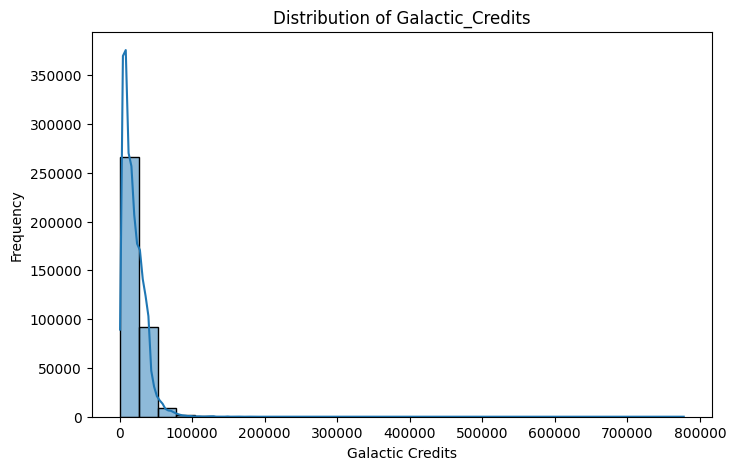

In [22]:
# CODE CELL: Generate visualizations (e.g., scatter plots, histograms)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df["Galactic_Credits"], bins=30, kde=True)

plt.title("Distribution of Galactic_Credits")
plt.xlabel("Galactic Credits")
plt.ylabel("Frequency")

plt.show()

**Data insights and data quality**

*Insights:*
- The distribution of ship prices is right-skewed, meaning most ships are relatively cheap, but a few rare ships cost a lot more.
- The median price is lower than the mean, showing that extreme values are pulling the average up.
- This tells us that using the mean as a baseline might overestimate the price for most ships, while the median could be a safer guess.
- Most ships fall in the mid-range, indicating that overpricing common ships is likely part of the problem Nebula Brokerage is facing.

**Quality issues:**

In [34]:
# Missing values
df.isnull().sum()   

Ship_ID                 0
Galactic_Credits        0
Model_Cycle          7406
Ship_Manufacturer       0
Sector                  0
dtype: int64

In [ ]:
# Duplicates
df.duplicated().sum()

np.int64(500)

In [35]:
# Identify outliers (extreme values)
df["Galactic_Credits"].sort_values().tail()

114649    566567
304796    655000
193465    750000
246194    777777
356278    777777
Name: Galactic_Credits, dtype: int64

---

## 3. Data Preparation
*Rubric: LO 6.4C (Data Science Steps)*

**Cleaning and preprocessing**
*Describe and justify steps taken (e.g., imputation, handling outliers, fixing other errors).*

In [15]:
df = df.dropna(subset=["Galactic_Credits"])
df = df.drop_duplicates()

We are completly removing no values and duplicates because they an unbiased baseline. We are not adjusting dataset.

---

## 4. Modeling
*Rubric: LO 6.4C (Data Science Steps)*

## Model Setup

For this first iteration, we created a simple benchmark model to predict ship prices. This is called a **naive regression model** because it doesn’t use any features — it just predicts a single number for all ships.

We used two approaches:

- **Mean Model:** Predicts the average `Galactic_Credits` for every ship.  
- **Median Model:** Predicts the median `Galactic_Credits` for every ship.  

**Why we did this:**

- These models provide a **baseline** to measure how well any future, more advanced model performs.  
- The **median** is particularly useful because the price data is **right-skewed**, so extreme high prices don’t overly affect it.

In [36]:
# CODE CELL: Model training and setup code
mean_price = df["Galactic_Credits"].mean()
median_price = df["Galactic_Credits"].median()

**Testing and performance**

To test our naive benchmark models:

- Each ship in the dataset was assigned the same predicted price:
  - **Mean model:** predicted the overall average price for all ships.
  - **Median model:** predicted the overall median price for all ships.
- We then compared these predictions to the actual `Galactic_Credits` values for each ship.
- This allowed us to measure how far off our simple guesses were on average and for large outliers.

### Performance Metrics

We used two common metrics to evaluate the models:

- **MAE (Mean Absolute Error):** Measures the average absolute difference between predicted and actual prices. Lower values mean better predictions.  
- **RMSE (Root Mean Squared Error):** Measures the average squared difference. It penalizes large errors more, which is useful because very expensive ships can heavily affect pricing accuracy.

### Results Overview

| Model   | MAE       | RMSE       |
|---------|-----------|------------|
| Mean    | 11,607.02 | 15,540.45  |
| Median  | 11,282.12 | 15,921.74  |

### Interpretation

- The **median model** usually performs better on this dataset because the prices are **right-skewed** — a few very expensive ships make the mean higher than the typical ship price.  
- **MAE** shows average error, so a lower MAE means our guesses are closer to most ship prices.  
- **RMSE** shows error sensitivity to extremes — the mean model often has a lower RMSE in this case, but the median is safer overall for typical prices.  
- Overall, these metrics confirm that using the **median Galactic_Credits** is the safer baseline for predicting ship prices in this inventory.

In [40]:
# CODE CELL: Model evaluation code
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Calculate mean and median of Galactic_Credits
mean_price = df["Galactic_Credits"].mean()
median_price = df["Galactic_Credits"].median()

# Create prediction arrays (same value for all ships)
pred_mean = [mean_price] * len(df)
pred_median = [median_price] * len(df)

# Calculate mean and median of Galactic_Credits
mean_price = df["Galactic_Credits"].mean()
median_price = df["Galactic_Credits"].median()

# Create prediction arrays (same value for all ships)
pred_mean = [mean_price] * len(df)
pred_median = [median_price] * len(df)

# Mean model
mae_mean = mean_absolute_error(df["Galactic_Credits"], pred_mean)
rmse_mean = np.sqrt(mean_squared_error(df["Galactic_Credits"], pred_mean))

# Median model
mae_median = mean_absolute_error(df["Galactic_Credits"], pred_median)
rmse_median = np.sqrt(mean_squared_error(df["Galactic_Credits"], pred_median))

print("Mean Model - MAE:", round(mae_mean, 2), "RMSE:", round(rmse_mean, 2))
print("Median Model - MAE:", round(mae_median, 2), "RMSE:", round(rmse_median, 2))

Mean Model - MAE: 11607.02 RMSE: 15540.45
Median Model - MAE: 11282.12 RMSE: 15921.74


---

## 5. Evaluation
*Rubric: LO 6.4C (Results vs. Objectives)*

**Assessment against succes criteria** 
*What is the difference between the metrics? What does this mean? Did you meet the goals set in the Business Understanding?*

Model    MAE    RMSE

Mean    11607    15540

Median    11282    15922

The median model has a lower MAE, meaning it predicts prices closer to the actual value for most ships.

The mean model has a slightly lower RMSE, showing it handles extreme expensive ships a bit better.

Since ship prices are right-skewed, the median is a safer baseline for typical ships.

Conclusion:
We successfully created a baseline model. The median Galactic_Credits is a good reference for future models.

**Key findings and limitations**
*What did you learn? What are the limitations of this current model?*

**Findings:**

Most ships are relatively cheap; a few are very expensive.

The median gives a better estimate for the majority of ships.

A data-driven baseline is safer than guessing prices by gut feeling.

**Limitations:**

The model predicts the same price for all ships; it doesn’t use any features.

Extreme expensive ships still cause large errors (seen in RMSE).

Missing Model_Cycle values were dropped; better handling could improve future models.

---

## 6 Personal Contribution
*Rubric: LO 7.3P (Equal Contribution)*

| Student name | Contribution | Personal lessons learned |
| :--- | :--- | :--- |
| Sanne Jimkes | 2 Data Understanding, 4 Modeling (we did pair programming for all by screensharing and in call)| *Personal lessons learned this iteration* |
| Naimi de Jong | 1 Business Understanding, 3 Data Preparation, 5 Evaluation (we did pair programming for all by screensharing and in call) | *Personal lessons learned this iteration* |